# Conformal mapping

###### This workbook supports Section 4.3 of the book. Here, we will apply conformal mapping in order to generate the flow field about bodies of general shape.

First, we'll load the module and make some tools available.

In [10]:
using BookExamples
import PotentialFlow.Utils:@get
@get PotentialFlow (Bodies, Vortex, Source);

Now, let's generate a body shape. We will do this using the power series family of conformal maps (A.136), and the rigid-body mapping (A.135). These coefficients are specified in descending order of powers of $\zeta$---`C[1]` corresponds to $c_{1}$, the coefficient of $\zeta^1$; `C[2]` to $c_0$, the coefficient of $\zeta^0$; `C[3]` to $c_{-1}$, the coefficient of $\zeta^{-1}$, etc. The body's reference position is set by `Zᵣ` and the angle (in radians) by `α`.

In [2]:
Zᵣ = complex(0.0)
α = 0.0
C = Complex128[1, 0, 0, 0.1, 0.1*exp(im*π/4)]
body = Bodies.PowerBody(C,Zᵣ,α)

Power series body: C = Complex{Float64}[1.0+0.0im, 0.0+0.0im, 0.0+0.0im, 0.1+0.0im, 0.0707107+0.0707107im], c = 0.0 + 0.0im, α = 0.0ᵒ


Let's inspect the streamline pattern generated by motion of the body. Below, we can set the rigid-body motion parameters. The velocity of the body's reference point (in inertial coordinates) is set by `Żᵣ` and its angular velocity by `Ω`.

In [3]:
Żᵣ = complex(1.0im)
Ω = 0.0
m = Bodies.RigidBodyMotion(Żᵣ,Ω)

Rigid Body Motion:
  ċ = 0.0 + 1.0im
  c̈ = 0.0 + 0.0im
  α̇ = 0.0
  Constant (ċ = 0.0 + 1.0im, α̇ = 0.0)

Now plot the streamlines for the selected motion. The motion we specified above was constant, so it's not very important what time we evaluate the flow field at. We'll evaluate it at $t = 0$.

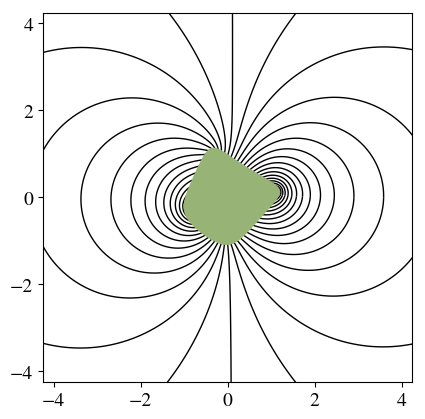

In [4]:
t = 0.0;
plot_streamlines(body,m,t);

Next, let's try to add a point vortex and visualize the resulting flow. We need to specify the position of the vortex in the circle plane, `ζᵥ`, because we lack the inverse of this conformal map. Without loss of generality, the strength of the vortex,  `Γᵥ`,  can be set to $1$ in the absence of other flow contributors.

In [5]:
ζᵥ = 2*exp(im*π/6);
Γᵥ = 1.0;
vort = Vortex.Point(ζᵥ, Γᵥ);

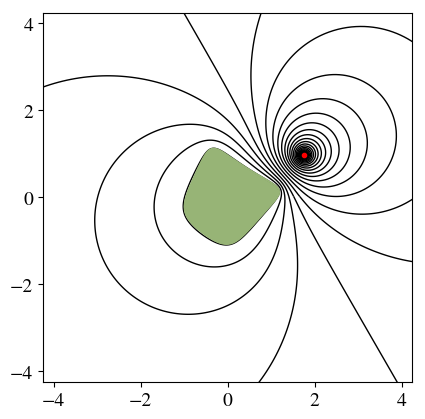

In [6]:
plot_streamlines(body,vort,0.0);

Try playing around with some of the parameters above. We can add a few vortices to the fluid:

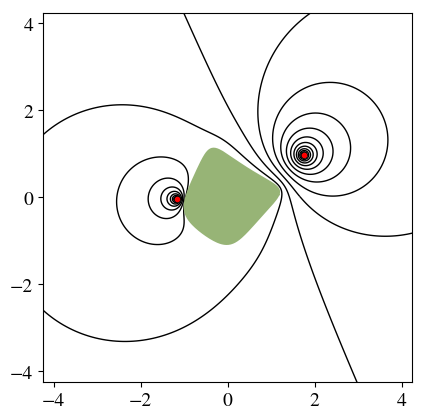

In [14]:
vorts = (Vortex.Point(2*exp(im*π/6), 1.0),Vortex.Point(complex(-1.2), -1.0));
plot_streamlines(body,vorts,0.0);

We can also easily generate bodies of other shapes. For example, here's an ellipse of aspect ratio 5.

In [15]:
Zᵣ = complex(0.0)
α = 0.0
a = 0.5; b = 0.1;
C = Complex128[(a+b)/2, 0, (a-b)/2]
body = Bodies.PowerBody(C,Zᵣ,α)

Power series body: C = Complex{Float64}[0.3+0.0im, 0.0+0.0im, 0.2+0.0im], c = 0.0 + 0.0im, α = 0.0ᵒ


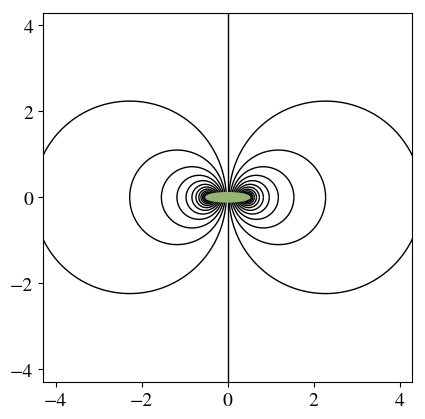

In [16]:
t = 0.0;
plot_streamlines(body,m,t);